In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = plt.axes(projection='3d')

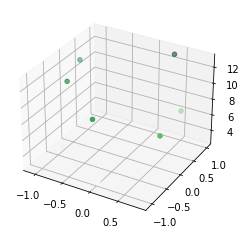

In [2]:
ax = plt.axes(projection='3d')
p = 10
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(p)
xdata = np.sin(zdata) + 0.1 * np.random.randn(p)
ydata = np.cos(zdata) + 0.1 * np.random.randn(p)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [32]:
import plotly.graph_objects as go
import numpy as np

p = 100
z = 15 * np.random.random(100)
x = np.sin(z) + 0.2 * np.random.randn(100)
y = np.cos(z) + 0.2 * np.random.randn(100)
c = 50 * np.random.random(100)
trace = go.Scatter3d(
   x = x, y = y, z = z,mode = 'markers', marker = dict(
      size = 5, line=dict(width=1,color='DarkSlateGrey'),
      color = z #, # set color to an array/list of desired values
      #colorscale = 'Inferno'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
#iplot(fig)

fig.show()

In [5]:
import pandas as pd
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D

df = pd.read_csv("../Chembl_RBP.csv")
print(df)

    component_synonym      chembl_id   molecule_type  max_phase  \
0                papD  CHEMBL1213881  Small molecule          0   
1                papD  CHEMBL1213882  Small molecule          0   
2                papD  CHEMBL1213883  Small molecule          0   
3                papD  CHEMBL1213947  Small molecule          0   
4                papD  CHEMBL1213948  Small molecule          0   
..                ...            ...             ...        ...   
480              SMN2  CHEMBL4584853             NaN          0   
481            ELAVL1       CHEMBL50  Small molecule          3   
482            ELAVL3       CHEMBL50  Small molecule          3   
483            ELAVL3     CHEMBL6246  Small molecule          2   
484              SMN2       CHEMBL98  Small molecule          4   

                                      canonical_smiles  CHEMBL_Target  \
0    COC(=O)[C@@H]1CSc2c(C3CC3)c(Cc3cccc4ccccc34)cc...  CHEMBL3309037   
1    COC(=O)[C@@H]1C(C)Sc2c(C3CC3)c(Cc3cccc4ccccc

In [6]:
mollist = df['canonical_smiles']
print(mollist)

0      COC(=O)[C@@H]1CSc2c(C3CC3)c(Cc3cccc4ccccc34)cc...
1      COC(=O)[C@@H]1C(C)Sc2c(C3CC3)c(Cc3cccc4ccccc34...
2      COC(=O)[C@@H]1C(OC)Sc2c(C3CC3)c(Cc3cccc4ccccc3...
3      COC(=O)[C@@H]1C(c2ccccc2)Sc2c(C3CC3)c(Cc3cccc4...
4       Cc1sc2c(C3CC3)c(Cc3cccc4ccccc34)cc(=O)n2c1C(=O)O
                             ...                        
480    Cc1cn2nc(-c3cc(=O)n4cc(N5CCN6CCC[C@H]6C5)ccc4n...
481           O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
482           O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12
483           O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
484                          O=C(CCCCCCC(=O)Nc1ccccc1)NO
Name: canonical_smiles, Length: 485, dtype: object


In [11]:
mol =[]
qed =[]
for i in mollist:
    #print(i)
    mt = Chem.MolFromSmiles(i)
    qed.append(Chem.QED.default(mt))
    mol.append(mt)
    
#Draw.MolsToGridImage(mol, molsPerRow=4, maxMols = 200)
#print(qed)
df['qed'] = qed
print(df)

    component_synonym      chembl_id   molecule_type  max_phase  \
0                papD  CHEMBL1213881  Small molecule          0   
1                papD  CHEMBL1213882  Small molecule          0   
2                papD  CHEMBL1213883  Small molecule          0   
3                papD  CHEMBL1213947  Small molecule          0   
4                papD  CHEMBL1213948  Small molecule          0   
..                ...            ...             ...        ...   
480              SMN2  CHEMBL4584853             NaN          0   
481            ELAVL1       CHEMBL50  Small molecule          3   
482            ELAVL3       CHEMBL50  Small molecule          3   
483            ELAVL3     CHEMBL6246  Small molecule          2   
484              SMN2       CHEMBL98  Small molecule          4   

                                      canonical_smiles  CHEMBL_Target  \
0    COC(=O)[C@@H]1CSc2c(C3CC3)c(Cc3cccc4ccccc34)cc...  CHEMBL3309037   
1    COC(=O)[C@@H]1C(C)Sc2c(C3CC3)c(Cc3cccc4ccccc

In [90]:
import plotly.express as px
from plotly.validators.scatter.marker import SymbolValidator

c = df['qed']
s = df['max_phase']
sy = []
raw_symbols = SymbolValidator().values
#symlist = [0,1,2,15,18]
symlist = ['circle', 'circle-open', 'square', 'square-open',
            'diamond', 'diamond-open', 'cross', 'x']
#print(raw_symbols)
for i in s:
    #j = symlist[i]*12+2
    k = symlist[i]
    #print(i, j, k)
    sy.append(k)
    
#print(sy)
#print(s)
    
#print(c,s)

trace = go.Scatter3d(
   x = df['chembl_id'], y = df['CHEMBL_Target'], z = df['ChemBL_Assay'], 
    mode = 'markers', marker = dict(
      size = 5, line=dict(width=1,color='DarkSlateGrey'#, marker_symbol = 1
                         ),
      #marker_symbol = 1, 
      color = c, #, # set color to an array/list of desired values
      #colorscale = 'Inferno'
    symbol = sy
      )
   )

layout = go.Layout(title = '3D Scatter plot', scene = dict(
                    xaxis_title='Compound',
                    yaxis_title='Protein',
                    zaxis_title='Assay'))
fig = go.Figure(data = [trace], layout = layout)
#iplot(fig)

fig.show()

In [71]:
import plotly.express as px
from plotly.validators.scatter.marker import SymbolValidator

c = df['qed']
s = df['max_phase']
#print(c,s)

trace = px.scatter_3d(
   x = df['chembl_id'], y = df['CHEMBL_Target'], z = df['ChemBL_Assay'], 
    #mode = 'markers', 
    #marker = dict(
      size = ((s+1)/(s+1)), #, line=dict(width=1,color='DarkSlateGrey', marker_symbol = 1),
      #marker_symbol = 1, 
      color = c, 
    symbol = s #, # set color to an array/list of desired values
      #colorscale = 'Inferno'
    #symbol = 1
      )
   #)

#layout = px.Layout(title = '3D Scatter plot', scene = dict(
#                    xaxis_title='Compound',
#                    yaxis_title='Protein',
#                    zaxis_title='Assay'))
#fig = px.Figure(data = [trace], layout = layout)
#iplot(fig)
#trace(show)
trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [81]:
symbols = []
for i in range(0,len(raw_symbols),3):
    name = raw_symbols[i+2]
    print(i, name)
    symbols.append(raw_symbols[i])
    
print(symbols)

0 circle
3 circle-open
6 circle-dot
9 circle-open-dot
12 square
15 square-open
18 square-dot
21 square-open-dot
24 diamond
27 diamond-open
30 diamond-dot
33 diamond-open-dot
36 cross
39 cross-open
42 cross-dot
45 cross-open-dot
48 x
51 x-open
54 x-dot
57 x-open-dot
60 triangle-up
63 triangle-up-open
66 triangle-up-dot
69 triangle-up-open-dot
72 triangle-down
75 triangle-down-open
78 triangle-down-dot
81 triangle-down-open-dot
84 triangle-left
87 triangle-left-open
90 triangle-left-dot
93 triangle-left-open-dot
96 triangle-right
99 triangle-right-open
102 triangle-right-dot
105 triangle-right-open-dot
108 triangle-ne
111 triangle-ne-open
114 triangle-ne-dot
117 triangle-ne-open-dot
120 triangle-se
123 triangle-se-open
126 triangle-se-dot
129 triangle-se-open-dot
132 triangle-sw
135 triangle-sw-open
138 triangle-sw-dot
141 triangle-sw-open-dot
144 triangle-nw
147 triangle-nw-open
150 triangle-nw-dot
153 triangle-nw-open-dot
156 pentagon
159 pentagon-open
162 pentagon-dot
165 pentagon-ope